<a href="https://colab.research.google.com/github/vin136/NN-foundations/blob/main/Estimating_Probabilities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

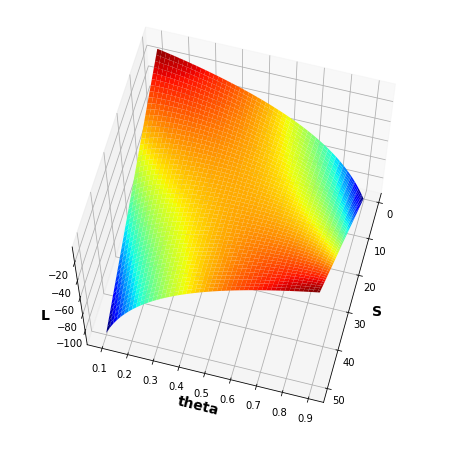

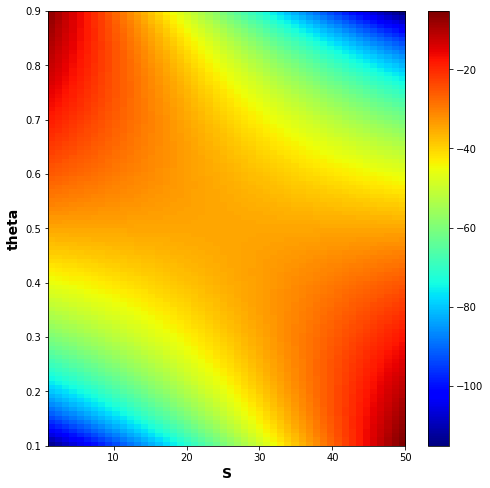

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 50
S = np.arange(1, N+1)
theta = np.linspace(0.1, 0.9, 100)
S_grid, theta_grid = np.meshgrid(S, theta)
L = S_grid*np.log(theta_grid) + (N-S_grid)*np.log(1-theta_grid)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(S_grid, theta_grid, L, cmap='jet')
ax.set_xlabel('S', fontsize=14, fontweight='bold')
ax.set_ylabel('theta', fontsize=14, fontweight='bold')
ax.set_zlabel('L', fontsize=14, fontweight='bold')
ax.view_init(elev=65, azim=15)

plt.figure(figsize=(8, 8))
plt.imshow(L, cmap='jet', extent=[1, N, 0.1, 0.9], aspect='auto')
plt.xlabel('S', fontsize=14, fontweight='bold')
plt.ylabel('theta', fontsize=14, fontweight='bold')
plt.colorbar()


Useful resources

1. [prob](https://probability4datascience.com/ch08.html)
2.[MLE VS MAP](https://zhiyzuo.github.io/MLE-vs-MAP/)
3. [Maths for ml](https://mml-book.github.io/book/mml-book.pdf),[github](https://github.com/mml-book/mml-book.github.io)